In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def showPicture(input_arr_np, grayscale=False):
    if len(input_arr_np.shape) == 2 or grayscale:
        plt.imshow(input_arr_np.astype(np.uint8), cmap='gray')
    else: plt.imshow(input_arr_np.astype(np.uint8))
    plt.show()

In [3]:
def savePictureRGB(result, filename):
    data = Image.fromarray(result.astype('uint8'), 'RGB')
    data.save(filename)

In [4]:
def savePictureGray(result, filename):
    data = Image.fromarray(result.astype('uint8'), 'L')
    data.save(filename)

In [5]:
def truncateImage(image):
    image = np.where(image > 255, 255, image)
    image = np.where(image < 0, 0, image)
    return image

In [6]:
def getPixels(filename):
    image = Image.open(filename)
    width, height = image.size
    pix = list(image.getdata())
    return np.array([pix[n:n+width] for n in range(0, width*height, width)])

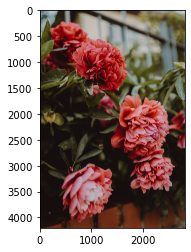

In [7]:
arr = getPixels('peony.jpg')
showPicture(arr)

In [8]:
def brightness(image, bright):
    return truncateImage(image + bright)

In [9]:
def grayscale(image):
    if len(image.shape) == 2:
        return image
    R = np.array(image[:, :, 0])
    G = np.array(image[:, :, 1])
    B = np.array(image[:, :, 2])
    return (R *.299 + G *.587 + B *.114) 

In [10]:
def calculateF_contrast(cont):
    return round((259 * (255 + cont)) / (255 * (259 - cont)), 5)

def contrast(image, cont):
    return truncateImage(calculateF_contrast(cont) * (image - 128) + 128)

In [11]:
def mirror_I(image):
    return np.fliplr(image)

def flip_I(image):
    return np.flipud(image)

In [12]:
def overlay(imageA, imageB):
    return np.add(imageA, imageB)

In [13]:
# BB = np.array([[1,1,1], [1,1,1], [1,1,1]])

def boxblur(image):
    img2 = np.copy(image)
    height, width, channels = image.shape
#     kernel = np.array([[1,1,1], [1,1,1], [1,1,1]])
#     kernel_sum = 9

    filtered_sum_r = 0 
    filtered_sum_g = 0 
    filtered_sum_b = 0 
    
    for x in range(1,height-1):
        for y in range(1,width-1):
            for i in range(3):
                for j in range(3):
                    filtered_sum_r += image[x-1+i,y-1+j,0]
                    filtered_sum_g += image[x-1+i,y-1+j,1]
                    filtered_sum_b += image[x-1+i,y-1+j,2]

            new_pixel_r = filtered_sum_r / 9
            new_pixel_g = filtered_sum_g / 9
            new_pixel_b = filtered_sum_b / 9
            
            new_pixel_r = truncateImage(new_pixel_r)
            new_pixel_g = truncateImage(new_pixel_g)
            new_pixel_b = truncateImage(new_pixel_b)
            
            img2[x, y, 0] = new_pixel_r
            img2[x, y, 1] = new_pixel_g
            img2[x, y, 2] = new_pixel_b

            filtered_sum_r = 0 
            filtered_sum_g = 0 
            filtered_sum_b = 0 

    return img2

In [14]:
def blurGrey(I):
    for i in range(1,I.shape[0]-1):
        for j in range(1,I.shape[1]-1):
            I[i,j] = (4*I[i,j] + I[i-1,j] + I[i+1,j] + I[i,j-1] + I[i,j+1])/8.0
    return I

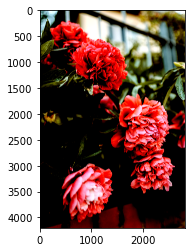

In [15]:
# Contrast
# print(arr)
contrastImage = contrast(arr, 100)  
# print(contrastImage.shape)
showPicture(contrastImage)

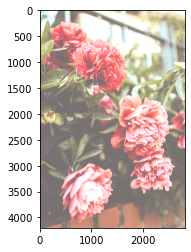

In [16]:
#Brightness
bri = brightness(arr, 100)  
showPicture(bri)

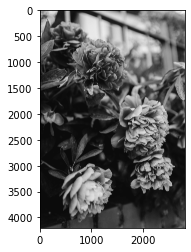

In [17]:
# Grayscale
grayImage = grayscale(arr)  
showPicture(grayImage, True)

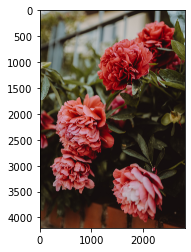

In [18]:
# Flip Horizontal
mH = mirror_I(arr)  
showPicture(mH)

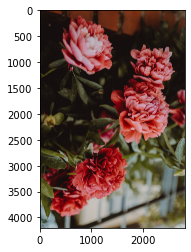

In [19]:
# Flip Vertical
fH = flip_I(arr)  
showPicture(fH)

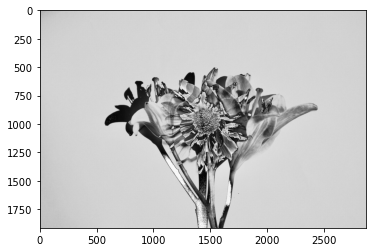

In [20]:
# Overlay
img1 = getPixels('gray_1.jpg')
img2 = getPixels('gray_4.jpg')
result = overlay(img1, img2)
showPicture(result)

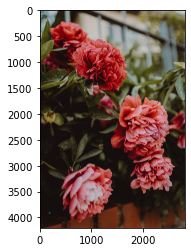

In [21]:
# Blur - Box Blur
re = boxblur(arr)
showPicture(re)
savePictureRGB(re, 'blur_RGB.jpg')